In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_excel('Cleaned_results.xlsx')
data = pd.DataFrame(data)

print(data)

            date home_team away_team  year  home  away  goal_margin
0     1879-01-18       EU1       EU3  1879     1    -1            1
1     1880-03-15       EU3       EU1  1880    -1     1            1
2     1881-02-26       EU1       EU3  1881    -1     1            1
3     1882-03-13       EU3       EU1  1882     1    -1            2
4     1883-02-03       EU1       EU3  1883     1    -1            5
...          ...       ...       ...   ...   ...   ...          ...
8760  2021-07-20       NA2       AS1  2021    -1     1            2
8761  2021-07-24       NA1       NA2  2021     1    -1            3
8762  2021-07-24       AS1       NA2  2021     1    -1            1
8763  2021-07-25       NA1       NA1  2021    -1     1            2
8764  2021-07-29       NA1       NA1  2021     1    -1            1

[8765 rows x 7 columns]


In [3]:
#sample analysis on AS1
use_AS1 = []
for k in range (len(data)):
    if data['home_team'][k] == 'AS1' and data['away_team'][k] not in ['AS1', 'AS2']:
        use_AS1.append(k)
for g in range (len(data)):
    if data['away_team'][g] == 'AS1' and data['home_team'][g] not in ['AS1', 'AS2']:
        use_AS1.append(g)
data_as1 = data.filter(items = use_AS1, axis = 0)
data_as1 = data_as1.replace(to_replace = r'^NA.$', value = 'North_America', regex = True)
data_as1 = data_as1.replace(to_replace = r'^EU.$', value = 'Europe', regex = True)
data_as1 = data_as1.replace(to_replace = r'^SA.$', value = 'South_America', regex = True)
data_as1 = data_as1.replace(to_replace = r'^AF.$', value = 'Africa', regex = True)
print(data_as1)

            date      home_team      away_team  year  home  away  goal_margin
341   1924-06-07            AS1  North_America  1924     1    -1            1
342   1924-06-14            AS1  North_America  1924    -1     1            1
344   1924-06-23            AS1  North_America  1924     1    -1            3
345   1924-06-28            AS1  North_America  1924     0     0            0
347   1924-07-12            AS1  North_America  1924    -1     1            3
...          ...            ...            ...   ...   ...   ...          ...
8518  2019-06-20  South_America            AS1  2019     0     0            0
8525  2019-06-24  South_America            AS1  2019     0     0            0
8633  2020-10-12         Africa            AS1  2020     1    -1            4
8653  2020-11-13  North_America            AS1  2020     0     0            0
8760  2021-07-20  North_America            AS1  2021    -1     1            2

[380 rows x 7 columns]


In [4]:
asia = []
opponent = []
match_status = []
for x in range (len(data_as1)):
    asia.append('AS1')
    if np.array(data_as1['home_team'])[x] == 'AS1':
        opponent.append(np.array(data_as1['away_team'])[x])
        match_status.append(np.array(data_as1['home'])[x])
    else:
        opponent.append(np.array(data_as1['home_team'])[x])
        match_status.append(np.array(data_as1['away'])[x])
        
as1 = pd.DataFrame(data = {'Asia_tier1' : asia, 'opponent' : opponent, 'match_status' : match_status, 'goal_margin' : np.array(data_as1['goal_margin']), 'year' : np.array(data_as1['year'])})

print(as1)

    Asia_tier1       opponent  match_status  goal_margin  year
0          AS1  North_America             1            1  1924
1          AS1  North_America            -1            1  1924
2          AS1  North_America             1            3  1924
3          AS1  North_America             0            0  1924
4          AS1  North_America            -1            3  1924
..         ...            ...           ...          ...   ...
375        AS1  South_America             0            0  2019
376        AS1  South_America             0            0  2019
377        AS1         Africa            -1            4  2020
378        AS1  North_America             0            0  2020
379        AS1  North_America             1            2  2021

[380 rows x 5 columns]


In [5]:
#making sub-data-frame wrt opponent's region
as1_north_america = []
as1_europe =[]
as1_south_america =[]
as1_africa = []

for y in range (len(as1)):
    if opponent[y] == 'North_America':
        as1_north_america.append(y)
    elif opponent[y] == 'South_America':
        as1_south_america.append(y)
    elif opponent[y] == 'Europe':
        as1_europe.append(y)
    if opponent[y] == 'Africa':
        as1_africa.append(y)
#verifying
print(len(as1_africa) + len(as1_north_america) + len(as1_europe) + len(as1_south_america) )

380


In [6]:
#as1_vs_north_america 
as1_vs_north_america = as1.filter(items = as1_north_america, axis = 0)

#as1_vs_europe 
as1_vs_europe = as1.filter(items = as1_europe, axis = 0)

#as1_vs_south_america 
as1_vs_south_america = as1.filter(items = as1_south_america, axis = 0)

#as1_vs_africa 
as1_vs_africa = as1.filter(items = as1_africa, axis = 0)

as1_vs_north_america.to_excel("As_Tier1_vs_North_America.xlsx", index = False)
as1_vs_europe.to_excel("As_Tier1_vs_Europe.xlsx", index = False)
as1_vs_south_america.to_excel("As_Tier1_vs_South_America.xlsx", index = False)
as1_vs_africa.to_excel("As_Tier1_vs_Africa.xlsx", index = False)

    Asia_tier1 opponent  match_status  goal_margin  year
6          AS1   Africa            -1            1  1947
7          AS1   Africa            -1            2  1947
8          AS1   Africa             0            0  1947
9          AS1   Africa             1            4  1947
10         AS1   Africa            -1            1  1947
..         ...      ...           ...          ...   ...
360        AS1   Africa             0            0  2017
364        AS1   Africa            -1            1  2018
365        AS1   Africa             1            1  2018
368        AS1   Africa             1            1  2018
377        AS1   Africa            -1            4  2020

[105 rows x 5 columns]


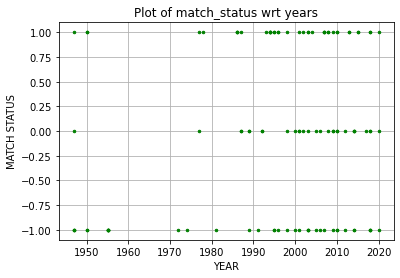

Text(0.5, 1.0, 'Histogram of match_status')

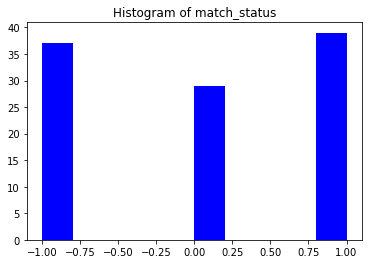

In [7]:
#checking
print(as1_vs_africa)

#plot as1_vs_africa
plt.plot(as1_vs_africa['year'], as1_vs_africa['match_status'], 'o-', ms = 2.5, color = 'green', linestyle = '')
plt.xlabel('YEAR')
plt.ylabel('MATCH STATUS')
plt.title('Plot of match_status wrt years')
plt.grid(True)
plt.show()

plt.hist(as1_vs_africa['match_status'], color = 'blue')
plt.title('Histogram of match_status')